In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.preprocessing import RobustScaler

In [2]:
df=pd.read_csv("bank.csv",sep=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

### PRIMARY ANALYSIS OF CATEGORICAL VARIABLES

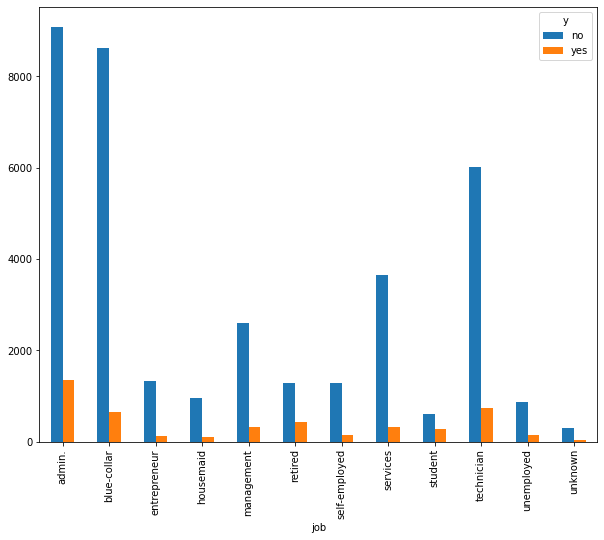

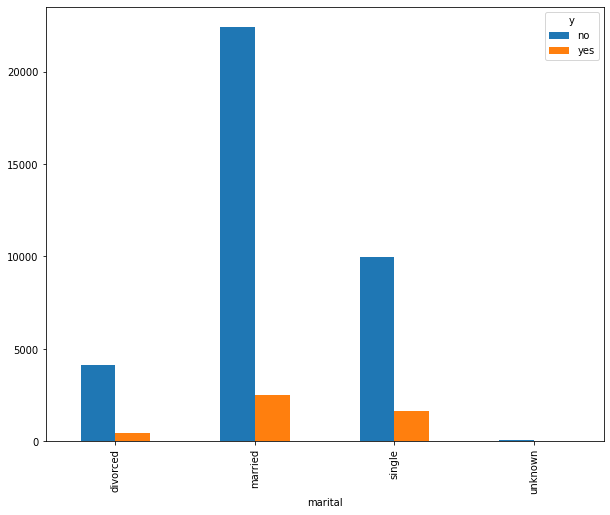

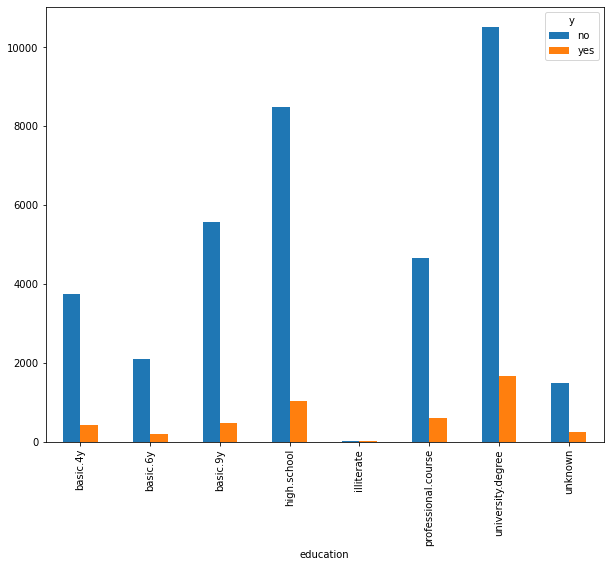

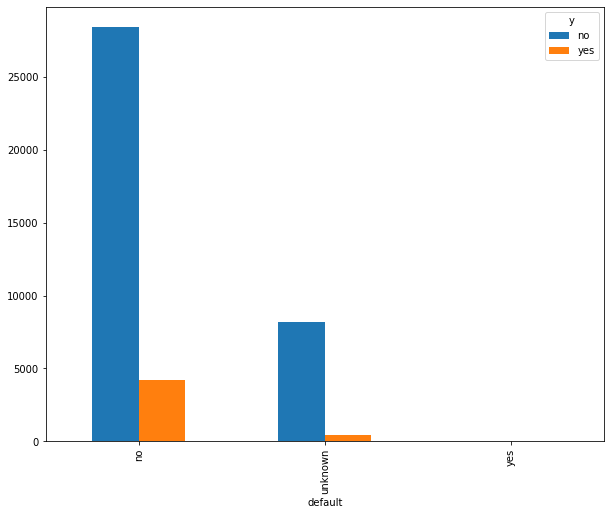

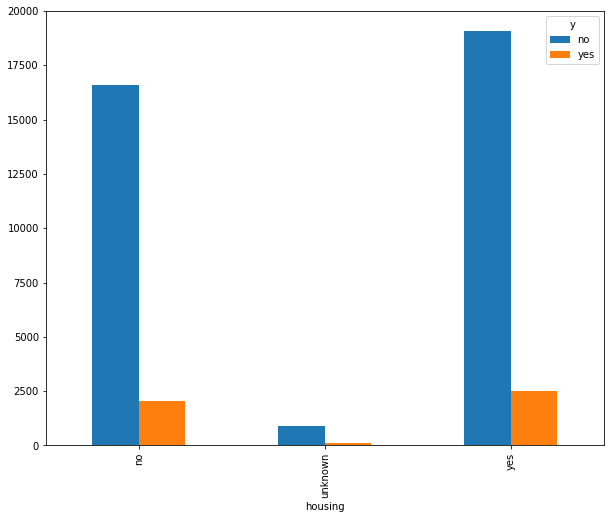

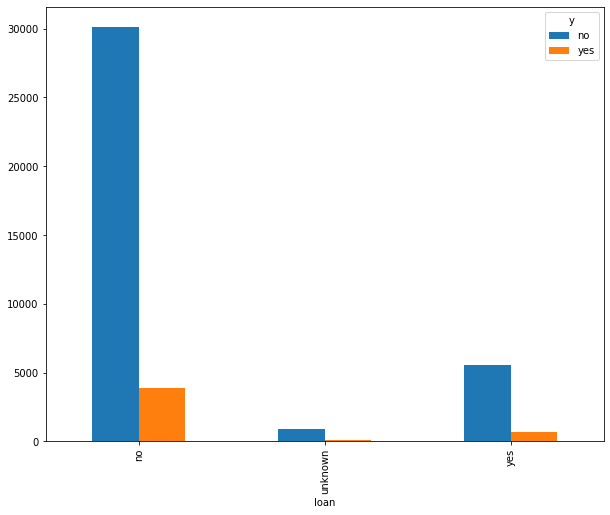

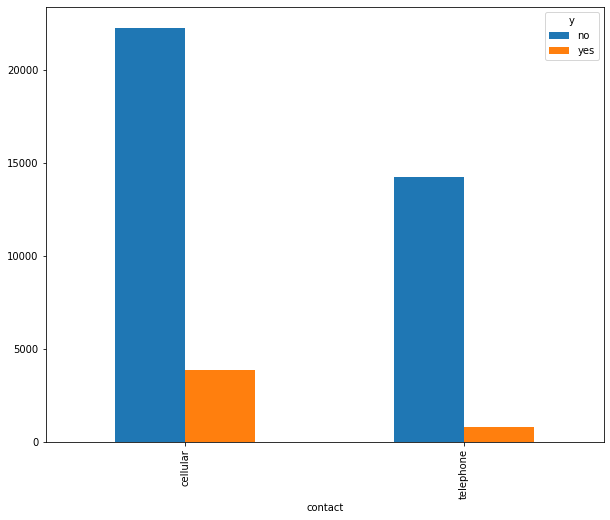

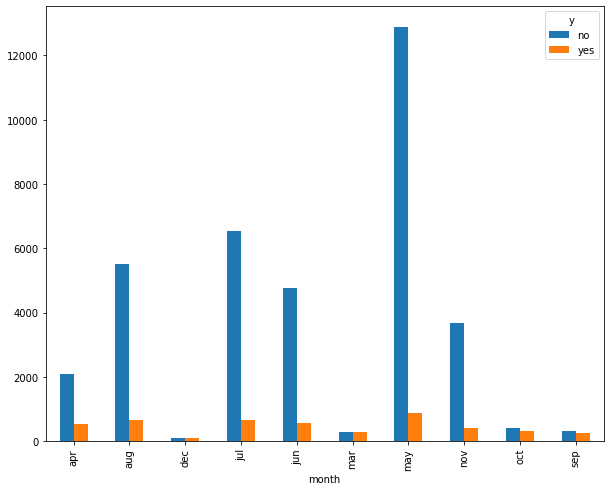

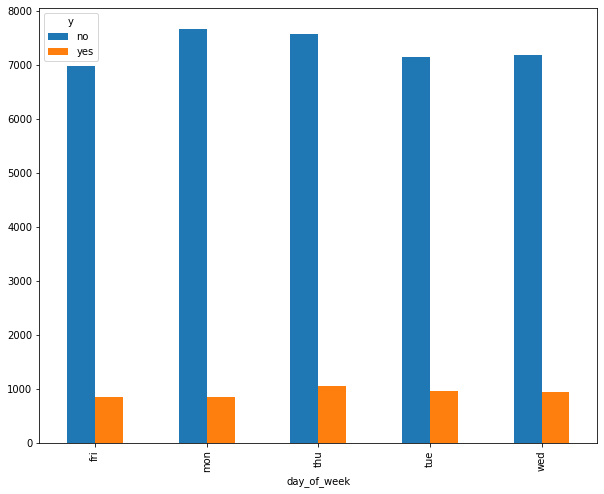

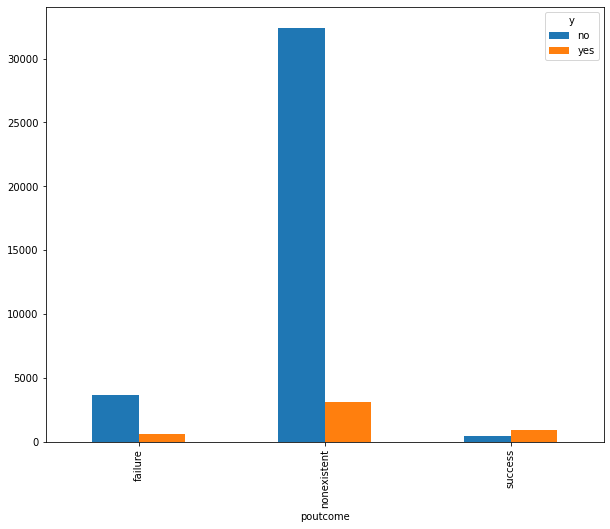

In [5]:
for i in df.columns:
    if i != "y" and df[i].dtype == "O" :
        CrosstabResult = pd.crosstab(index = df[i],columns=df['y'])
        CrosstabResult.plot.bar(figsize=(10,8))

### MISSING VALUE ANALYSIS

In [6]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### ENCODING THE NECESSARY COLUMNS

In [7]:
labelencoder = LabelEncoder()

In [8]:
a = ["default", "housing", "loan", "contact",]
for i in a:
    df[i] = labelencoder.fit_transform(df[i])

In [9]:
# one hot encoding remaining columns
df = pd.get_dummies(df, columns=["job", "marital", "education", 
                                "month", "day_of_week", "poutcome", 
                                "y"], drop_first = True)

### FEATURE SELECTION

In [10]:
df

,age,default,housing,loan,contact,duration,campaign,pdays,previous,emp.var.rate,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,0,0,0,1,261,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
1,57,1,0,0,1,149,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
2,37,0,2,0,1,226,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
3,40,0,0,0,1,151,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
4,56,0,0,2,1,307,1,999,0,1.1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,2,0,0,334,1,999,0,-1.1,...,1,0,0,0,0,0,0,1,0,1
41184,46,0,0,0,0,383,1,999,0,-1.1,...,1,0,0,0,0,0,0,1,0,0
41185,56,0,2,0,0,189,2,999,0,-1.1,...,1,0,0,0,0,0,0,1,0,0
41186,44,0,0,0,0,442,1,999,0,-1.1,...,1,0,0,0,0,0,0,1,0,1


In [11]:
X = df.drop(["y_yes"], axis=1)
Y = df[["y_yes"]]

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [13]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, Y_train)

c:\python39\lib\site-packages\sklearn\feature_selection\_from_model.py:351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


SelectFromModel(estimator=RandomForestClassifier())

In [14]:
sel.get_support()

array([ True, False,  True, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True])

In [15]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)
len(selected_feat)

Index(['age', 'housing', 'duration', 'campaign', 'pdays', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'poutcome_success'],
      dtype='object')


11

In [16]:
lst=selected_feat

In [17]:
drop_list=[]
for i in df.columns:
    if i not in lst and i!='y_yes':
        drop_list.append(i)

In [18]:
drop_list

['default',
 'loan',
 'contact',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_basic.6y',
 'education_basic.9y',
 'education_high.school',
 'education_illiterate',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_nonexistent']

In [19]:
df.drop(drop_list,axis=1,inplace=True)

In [20]:
df

,age,housing,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,poutcome_success,y_yes
0,56,0,261,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,0,149,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,2,226,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,0,151,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,0,307,1,999,1.1,93.994,-36.4,4.857,5191.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,2,334,1,999,-1.1,94.767,-50.8,1.028,4963.6,0,1
41184,46,0,383,1,999,-1.1,94.767,-50.8,1.028,4963.6,0,0
41185,56,2,189,2,999,-1.1,94.767,-50.8,1.028,4963.6,0,0
41186,44,0,442,1,999,-1.1,94.767,-50.8,1.028,4963.6,0,1


### SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
X = df.drop(["y_yes"], axis=1)
Y = df[["y_yes"]]

In [23]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

### SCALING THE DATA

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.37373845, -1.04194754, -0.34877342, ...,  1.00407473,
         0.64066217, -0.32894313],
       [ 1.46022083, -1.04194754, -0.66193603, ...,  1.00407473,
         0.64066217, -0.32894313],
       [-0.2694269 ,  1.10129304, -0.44663673, ...,  1.00407473,
         0.64066217, -0.32894313],
       ...,
       [ 1.97911515, -1.04194754, -0.23692963, ..., -1.18222172,
        -1.35515394,  3.0400392 ],
       [ 2.67097424,  1.10129304, -0.16982336, ..., -1.16561361,
        -1.65308845, -0.32894313],
       [-1.13425076,  1.10129304, -0.49696644, ..., -1.13258973,
        -1.65308845,  3.0400392 ]])

### TEST TRAIN SPLIT

In [27]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)
  
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (51167, 11)
Number transactions y_train dataset:  (51167, 1)
Number transactions X_test dataset:  (21929, 11)
Number transactions y_test dataset:  (21929, 1)


### Logistic regression

In [28]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train,Y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [29]:
print(f'Train Score:  {log_model.score(X_train, Y_train)}')
print(f'Train Score:  {log_model.score(X_test, Y_test)}')

Train Score:  0.8538315711298298
Train Score:  0.8528888686214602


### ADA Boost

In [30]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train,Y_train.values.ravel())

AdaBoostClassifier()

In [31]:
print(f'Train Score:  {ada_model.score(X_train, Y_train)}')
print(f'Train Score:  {ada_model.score(X_test, Y_test)}')

Train Score:  0.8968866652334513
Train Score:  0.8952984632222172


### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
bayes_model = GaussianNB()
bayes_model.fit(X_train, Y_train.values.ravel())

GaussianNB()

In [33]:
print(f'Train Score:  {bayes_model.score(X_train, Y_train)}')
print(f'Train Score:  {bayes_model.score(X_test, Y_test)}')

Train Score:  0.803799323782907
Train Score:  0.799489260796206


### KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier()

In [35]:
print(f'Train Score:  {knn_model.score(X_train, Y_train)}')
print(f'Train Score:  {knn_model.score(X_test, Y_test)}')

Train Score:  0.9330036937870112
Train Score:  0.9076109261708241


### SVM

In [36]:
svm_model=svm.SVC(C=18,kernel='poly')

In [37]:
svm_model.fit(X_train, Y_train.values.ravel())

SVC(C=18, kernel='poly')

In [38]:
print(f'Train Score:  {svm_model.score(X_train, Y_train)}')
print(f'Train Score:  {svm_model.score(X_test, Y_test)}')

Train Score:  0.8878378642484414
Train Score:  0.8886862146016691


### PERFORMANCE EVALUATION

In [39]:
y_pred_log = log_model.predict(X_test)
y_pred_ada = ada_model.predict(X_test)
y_pred_bayes = bayes_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

In [40]:
print("Logistic Regression : ", recall_score(Y_test, y_pred_log))
print("Ada Boost : ", recall_score(Y_test, y_pred_ada))
print("Naive Bayes : ", recall_score(Y_test, y_pred_bayes))
print("KNN : ", recall_score(Y_test, y_pred_knn))
print("SVM : ", recall_score(Y_test, y_pred_svm))

Logistic Regression :  0.8530048727666486
Ada Boost :  0.8993863923479516
Naive Bayes :  0.7196354448655478
KNN :  0.9407146724417975
SVM :  0.9217650243638332


### Our aim is to predict if the client will subscribe to term deposit or not hence we require our False Negative rate to be as low as possible. So we consider the model with the highest Recall score. Therefore we can conclude that KNN is the best model for this dataset.